## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = study_data["Mouse ID"].count()
unique_mice = study_data["Mouse ID"].nunique()

print(f"In the study a there are a total number of {unique_mice} mice and {total_mice} measurements included.")

In the study a there are a total number of 249 mice and 1893 measurements included.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = pd.DataFrame(study_results.duplicated(subset=["Mouse ID", "Timepoint"]))

duplicate = pd.DataFrame(duplicate.loc[duplicate[0] == True], columns=["Mouse ID"])

duplicate["Mouse ID"] = [study_results.iloc[duplicate.index[x],0] for x in range(len(duplicate))]

duplicate

,Mouse ID
137,g989
360,g989
681,g989
869,g989
1111,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

difference = pd.DataFrame([study_results.iloc[duplicate.index[x],:] for x in range(len(duplicate))])

difference

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first").reset_index()

clean_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = clean_data["Mouse ID"].count()
clean_unique_mice = clean_data["Mouse ID"].nunique()

print(f"In the cleaned study data there are a total number of {clean_unique_mice} mice and {clean_total_mice} measurements included.")

In the cleaned study data there are a total number of 249 mice and 1888 measurements included.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

number_regimen = clean_data["Drug Regimen"].unique()

regimen_stats_1 = pd.DataFrame()

for regimen in number_regimen:
    regimen_data = clean_data.loc[clean_data["Drug Regimen"] == regimen]
    stats = pd.Series([regimen, 
    round(regimen_data["Tumor Volume (mm3)"].mean(),2),
    round(regimen_data["Tumor Volume (mm3)"].median(),2),
    round(regimen_data["Tumor Volume (mm3)"].var(),2),
    round(regimen_data["Tumor Volume (mm3)"].std(),2),
    round(regimen_data["Tumor Volume (mm3)"].sem(),2)])
    regimen_stats_1 = regimen_stats_1.append(stats, ignore_index=True)

regimen_stats_1 = regimen_stats_1.rename(columns={
    0:"Drug Regimen",
    1:"Tumor Volume MEAN",
    2:"Tumor Volume MED",
    3:"Tumor Volume VAR",
    4:"Tumor Volume STD",
    5:"Tumor Volume SEM"
    }).set_index(["Drug Regimen"])

regimen_stats_1

,Tumor Volume MEAN,Tumor Volume MED,Tumor Volume VAR,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.39,50.91,43.14,6.57,0.53


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

grouped_regimen_data = clean_data.groupby("Drug Regimen")

regimen_stats_2 = round(pd.DataFrame(grouped_regimen_data["Tumor Volume (mm3)"].mean()),2).rename(columns={"Tumor Volume (mm3)":"Tumor Volume MEAN"})
regimen_stats_2["Tumor Volume MED"] = round(grouped_regimen_data["Tumor Volume (mm3)"].median(),2)
regimen_stats_2["Tumor Volume VAR"] = round(grouped_regimen_data["Tumor Volume (mm3)"].var(),2)
regimen_stats_2["Tumor Volume STD"] = round(grouped_regimen_data["Tumor Volume (mm3)"].std(),2)
regimen_stats_2["Tumor Volume SEM"] = round(grouped_regimen_data["Tumor Volume (mm3)"].sem(),2)

regimen_stats_2

,Tumor Volume MEAN,Tumor Volume MED,Tumor Volume VAR,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

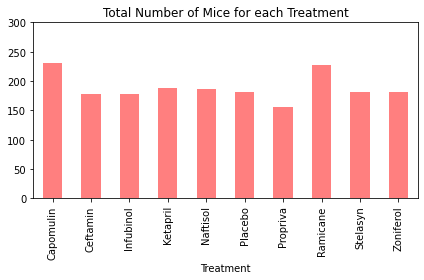

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_drug_data = pd.DataFrame(clean_data, columns=["Mouse ID", "Drug Regimen"])
mouse_drug_data = mouse_drug_data.groupby(["Drug Regimen"]).count()

mouse_drug_data.plot(kind="bar", color="red", alpha=0.5, title="Total Number of Mice for each Treatment",legend=False, align="center")
plt.xlabel("Treatment")
plt.ylim(0,300)
plt.tight_layout()
plt.show()

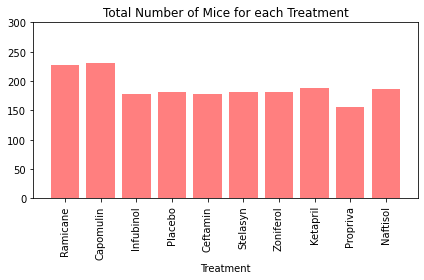

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(0, len(number_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

number_mice = []
for regimen in number_regimen:
    number_mice.append(mouse_drug_data.loc[regimen,"Mouse ID"])

plt.bar(x_axis, number_mice, facecolor="red", alpha=0.5, align="center")
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Treatment")
plt.ylim(0, 300)
plt.xticks(tick_locations, number_regimen, rotation=90)
plt.tight_layout()
plt.show()

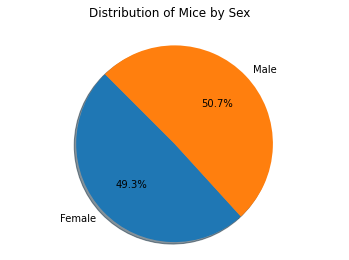

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_data = pd.DataFrame(clean_data, columns=["Mouse ID", "Sex"])
mouse_sex_data = mouse_sex_data.groupby(["Sex"]).count()
mouse_sex_data = mouse_sex_data.rename(columns={"Mouse ID":""})

mouse_sex_data.plot(kind="pie", subplots=True, title="Distribution of Mice by Sex", autopct="%1.1f%%", shadow=True, startangle=135, legend=False)
plt.axis("equal")
plt.show()

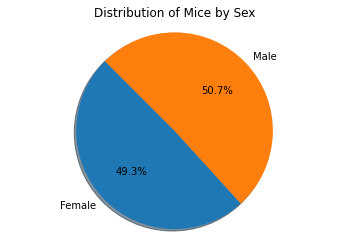

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = mouse_sex_data[""].unique()
labels = mouse_sex_data.index.array

plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("Distribution of Mice by Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp_data = pd.DataFrame(clean_data, columns=["Mouse ID", "Timepoint"])
greatest_tp_data = greatest_tp_data.groupby("Mouse ID").max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_data = pd.merge(greatest_tp_data,study_data,on=["Mouse ID","Timepoint"])

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []
tumor_stats = []

# Calculate the IQR and quantitatively determine if there are any potential outliers for each treatment
for regimen in tumor_regimen:
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"] == regimen]

    # add subset 
    if regimen == tumor_regimen[0]:
        tumor_vol_cap = data["Tumor Volume (mm3)"]
    if regimen == tumor_regimen[1]:
        tumor_vol_ram = data["Tumor Volume (mm3)"]
    if regimen == tumor_regimen[2]:
        tumor_vol_inf = data["Tumor Volume (mm3)"]
    if regimen == tumor_regimen[3]:
        tumor_vol_cef = data["Tumor Volume (mm3)"] 

    stats = data["Tumor Volume (mm3)"]
    lowerq = stats.quantile(.25)
    median = stats.quantile(.50)
    upperq = stats.quantile(.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_stats.append([regimen, lowerq, median, upperq, iqr, lower_bound, upper_bound])
    
tumor_stats_df = pd.DataFrame(tumor_stats)
tumor_stats_df = tumor_stats_df.rename(columns={0:"Drug Regimen",1:"Lower Quartile",2:"Median",3:"Upper Quartile",4:"Inter Quartile Range",5:"Lower Bound",6:"Upper Bound"})
tumor_stats_df

,Drug Regimen,Lower Quartile,Median,Upper Quartile,Inter Quartile Range,Lower Bound,Upper Bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
1,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


In [31]:
# Determine outliers using upper and lower bounds
outliers_cap = []
outliers_ram = []
outliers_inf = []
outliers_cef = []

for i in tumor_vol_cap:
    if i < tumor_stats_df.iloc[0,5]:
        outliers_cap.append(i)
    if i > tumor_stats_df.iloc[0,6]:
        outliers_cap.append(i)

for i in tumor_vol_ram:
    if i < tumor_stats_df.iloc[1,5]:
        outliers_ram.append(i)
    if i > tumor_stats_df.iloc[1,6]:
        outliers_ram.append(i)

for i in tumor_vol_inf:
    if i < tumor_stats_df.iloc[2,5]:
        outliers_inf.append(i)
    if i > tumor_stats_df.iloc[2,6]:
        outliers_inf.append(i)

for i in tumor_vol_cef:
    if i < tumor_stats_df.iloc[3,5]:
        outliers_cef.append(i)
    if i > tumor_stats_df.iloc[3,6]:
        outliers_cef.append(i)

print(f"For {tumor_regimen[0]} the potential ouliers are: {outliers_cap}")
print(f"For {tumor_regimen[1]} the potential ouliers are: {outliers_ram}")
print(f"For {tumor_regimen[2]} the potential ouliers are: {outliers_inf}")
print(f"For {tumor_regimen[3]} the potential ouliers are: {outliers_cef}")

For Capomulin the potential ouliers are: []
For Ramicane the potential ouliers are: []
For Infubinol the potential ouliers are: [36.321345799999996]
For Ceftamin the potential ouliers are: []


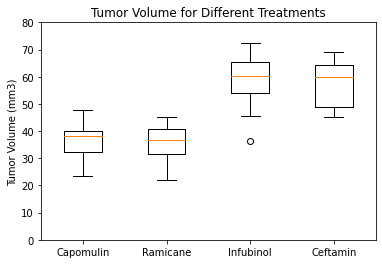

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef])
plt.title("Tumor Volume for Different Treatments")
plt.xticks([1,2,3,4],tumor_regimen)
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,80)
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
